# Capstone 2: Biodiversity Project by Shannon Boller

# Introduction
You are a biodiversity analyst working for the National Parks Service.  You're going to help them analyze some data about species at various national parks.

Note: The data that you'll be working with for this project is *inspired* by real data, but is mostly fictional.

# Step 1
Import the modules that you'll be using in this assignment:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline 

import pandas as pd

# Step 2
You have been given two CSV files. `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

Load the dataset and inspect it:
- Load `species_info.csv` into a DataFrame called `species`

In [2]:
species = pd.read_csv('species_info.csv')
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


Inspect each DataFrame using `.head()`.

In [3]:
observations = pd.read_csv('observations.csv')
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


# Step 3
Let's start by learning a bit more about our data.  Answer each of the following questions.

How many different species are in the `species` DataFrame?

In [4]:
count_of_species = species.scientific_name.count()
count_of_species

5824

In [5]:
count_of_unique_scientficnames = species.scientific_name.nunique()
print count_of_unique_scientficnames

5541


In [6]:
unique_species_list = species.scientific_name.unique()
unique_species_list

array(['Clethrionomys gapperi gapperi', 'Bos bison', 'Bos taurus', ...,
       'Parthenocissus vitacea', 'Vitis californica', 'Tribulus terrestris'], dtype=object)

In [7]:
unique_categories = species.category.unique()
unique_categories

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [8]:
n_unique_category = species.category.nunique()
n_unique_category

7

What are the different values of `category` in `species`?

In [9]:
unique_categories = species.category.unique()
unique_categories

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [10]:
percent_category = species.groupby('category').scientific_name.count().reset_index()
percent_category 

,category,scientific_name
0,Amphibian,80
1,Bird,521
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
5,Reptile,79
6,Vascular Plant,4470


In [11]:
percent_category['percentage'] = percent_category.apply(lambda row: row['scientific_name']*100.00/count_of_species, axis=1) 
percent_category

,category,scientific_name,percentage
0,Amphibian,80,1.373626
1,Bird,521,8.945742
2,Fish,127,2.180632
3,Mammal,214,3.674451
4,Nonvascular Plant,333,5.717720
5,Reptile,79,1.356456
6,Vascular Plant,4470,76.751374


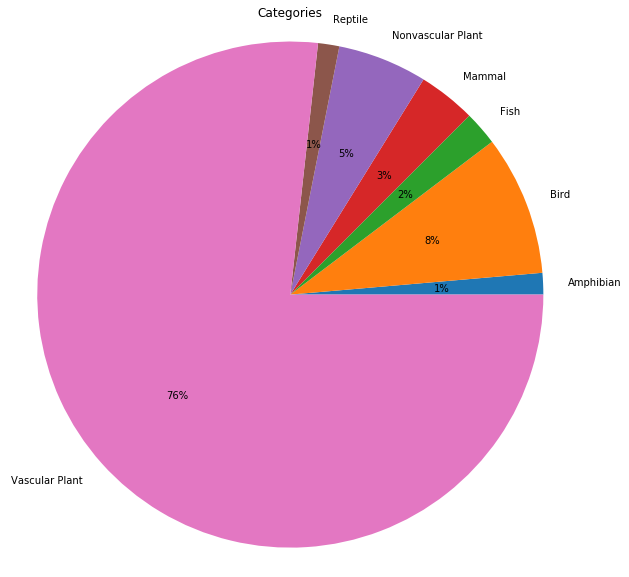

In [12]:
categories = percent_category.category
percentages = percent_category.percentage

plt.figure(figsize=(10, 10))
plt.pie(percentages, labels = categories, autopct = '%d%%')
plt.axis('equal')
plt.title("Categories")

plt.savefig('Species_Categories_pie_chart.png')

plt.show()

What are the different values of `conservation_status`?

In [13]:
conservation_status_types = species.conservation_status.unique()
conservation_status_types

array([nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery'], dtype=object)

# Step 4
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.  Use `groupby` to count how many `scientific_name` meet each of these criteria.

In [14]:
status_counts = species.groupby('conservation_status').scientific_name.count().reset_index()
status_counts 

,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


As we saw before, there are far more than 200 species in the `species` table.  Clearly, only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Because `groupby` does not include `None`, we will need to fill in the null values.  We can do this using `.fillna`.  We pass in however we want to fill in our `None` values as an argument.

Paste the following code and run it to see replace `None` with `No Intervention`:
```python
species.fillna('No Intervention', inplace=True)
```

In [15]:
species.fillna('No Intervention', inplace=True)

Great! Now run the same `groupby` as before to see how many species require `No Protection`.

In [16]:
status_counts_new = species.groupby('conservation_status').scientific_name.count().reset_index()
status_counts_new 

,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,No Intervention,5633
3,Species of Concern,161
4,Threatened,10


Let's use `plt.bar` to create a bar chart.  First, let's sort the columns by how many species are in each categories.  We can do this using `.sort_values`.  We use the the keyword `by` to indicate which column we want to sort by.

Paste the following code and run it to create a new DataFrame called `protection_counts`, which is sorted by `scientific_name`:
```python
protection_counts = species.groupby('conservation_status')\
    .scientific_name.count().reset_index()\
    .sort_values(by='scientific_name')
```

In [17]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.count().reset_index()\
    .sort_values(by='scientific_name')
protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,16
3,Species of Concern,161
2,No Intervention,5633


Now let's create a bar chart!
1. Start by creating a wide figure with `figsize=(10, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `scientific_name` column of `protection_counts`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `conservation_status` in `protection_counts`
5. Label the y-axis `Number of Species`
6. Title the graph `Conservation Status by Species`
7. Plot the grap using `plt.show()`

/Users/shannon/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


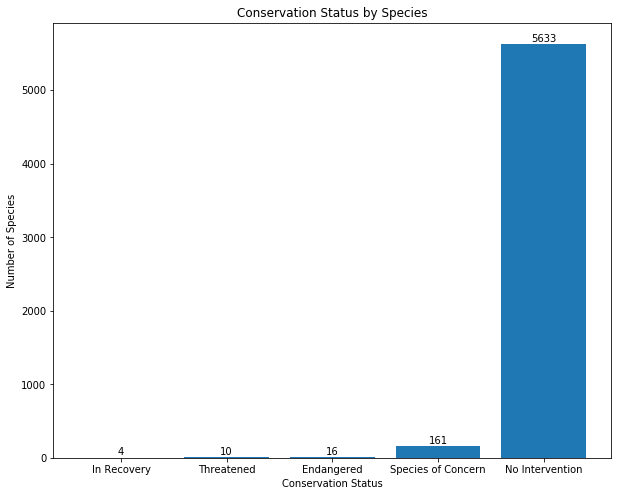

In [18]:
import numpy as np

x = protection_counts.conservation_status.unique()
y = protection_counts.scientific_name


plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(x)), y)
ax=plt.subplot()
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.title("Conservation Status by Species")

rects = ax.patches

# Now make some labels
labels = y

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

plt.savefig('Conservation_Status_by_Species_barchart.png')

# Step 4
Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [19]:
species['is_protected'] = species.apply(lambda row: "False" if row['conservation_status']== 'No Intervention' 
                                         else "True", axis=1) 
species.head(15)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


Let's group by *both* `category` and `is_protected`.  Save your results to `category_counts`.

In [20]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.count().reset_index()
category_counts

,category,is_protected,scientific_name
0,Amphibian,False,73
1,Amphibian,True,7
2,Bird,False,442
3,Bird,True,79
4,Fish,False,116
5,Fish,True,11
6,Mammal,False,176
7,Mammal,True,38
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


Examine `category_count` using `head()`.

In [21]:
category_counts.head()

,category,is_protected,scientific_name
0,Amphibian,False,73
1,Amphibian,True,7
2,Bird,False,442
3,Bird,True,79
4,Fish,False,116


It's going to be easier to view this data if we pivot it.  Using `pivot`, rearange `category_counts` so that:
- `columns` is `conservation_status`
- `index` is `category`
- `values` is `scientific_name`

Save your pivoted data to `category_pivot`. Remember to `reset_index()` at the end.

In [22]:
category_pivot = category_counts.pivot(columns = 'is_protected', index = 'category', 
                                       values = 'scientific_name').reset_index()
category_pivot

is_protected,category,False,True
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


Examine `category_pivot`.

Use the `.columns` property to  rename the categories `True` and `False` to something more description:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [23]:
category_pivot.rename(columns = {'False': 'not_protected', 'True': 'protected'}, inplace= True)
category_pivot

is_protected,category,not_protected,protected
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


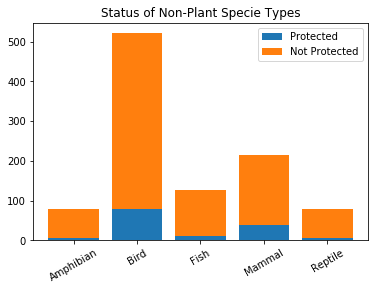

In [24]:
category = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile']
protected = [7, 79, 11, 38, 5]
not_protected = [73, 442, 116, 176, 74]

ax = plt.subplot()
plt.bar(range(len(category)), protected)
plt.bar(range(len(category)), not_protected, bottom=protected)
legend_labels = "Protected", "Not Protected"
plt.legend(legend_labels, loc=0)
ax.set_xticks(range(len(category)))
ax.set_xticklabels(category, rotation=30)
plt.title("Status of Non-Plant Specie Types")
plt.show()

Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species).

In [25]:
category_pivot['percent_protected'] = category_pivot.apply(lambda row:
                                                           (row['protected']*100.00 /
                                                            (row['protected']+row['not_protected'])), axis=1)
category_pivot


is_protected,category,not_protected,protected,percent_protected
0,Amphibian,73,7,8.750000
1,Bird,442,79,15.163148
2,Fish,116,11,8.661417
3,Mammal,176,38,17.757009
4,Nonvascular Plant,328,5,1.501502
5,Reptile,74,5,6.329114
6,Vascular Plant,4424,46,1.029083


Examine `category_pivot`.

It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  We're going to do a significance test to see if this statement is true.  Before you do the significance test, consider the following questions:
- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Based on those answers, you should choose to do a *chi squared test*.  In order to run a chi squared test, we'll need to create a contingency table.  Our contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

Create a table called `contingency` and fill it in with the correct numbers

In [26]:
contingency = [[38, 176],
     [79, 442]]
contingency 

[[38, 176], [79, 442]]

In order to perform our chi square test, we'll need to import the correct function from scipy.  Past the following code and run it:
```py
from scipy.stats import chi2_contingency
```

In [27]:
from scipy.stats import chi2_contingency

Now run `chi2_contingency` with `contingency`.

In [28]:
from scipy.stats import chi2_contingency

x = [[38, 176],
     [79, 442]]

chi2, pval, dof, expected = chi2_contingency(x)
print pval

0.445901703047


It looks like this difference isn't significant!

Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

In [29]:
from scipy.stats import chi2_contingency
#mammal vs. reptiles 
x = [[38, 176],
     [5, 74]]

chi2, pval, dof, expected = chi2_contingency(x)
print pval
# signfiicant 

0.0233846521487


Yes! It looks like there is a significant difference between `Reptile` and `Mammal`!

In [30]:
X = [[73, 7],
     [442, 79],
     [116, 11],
     [176, 38],
     [74, 5]]
chi2, pval, dof, expected = chi2_contingency(X)
print pval

0.0178887199618


In [31]:
from scipy.stats import chi2_contingency
# mammals vs. fish 
x = [[38, 176],
     [11, 116]]

chi2, pval, dof, expected = chi2_contingency(x)
print pval
#signficant difference 

0.0311452640828


In [32]:
from scipy.stats import chi2_contingency
# mammals vs. amphibians 
x = [[38, 176],
     [7, 73]]

chi2, pval, dof, expected = chi2_contingency(x)
print pval
#not significant 

0.0841692884746


In [33]:
from scipy.stats import chi2_contingency
# birds vs. amphibians 
x = [[79, 442],
     [7, 73]]

chi2, pval, dof, expected = chi2_contingency(x)
print pval
# not signficant 

0.175827797604


# Step 5

Conservationists have been recording sightings of different species at several national parks for the past 7 days.  They've saved sent you their observations in a file called `observations.csv`.  Load `observations.csv` into a variable called `observations`, then use `head` to view the data.

In [34]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  We'd like to know which rows of `species` are referring to sheep.  Notice that the following code will tell us whether or not a word occurs in a string:

In [35]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [36]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

False

Use `apply` and a `lambda` function to create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains `'Sheep'`, and `False` otherwise.

In [37]:
species['is_sheep'] = species.apply(lambda row: "True" if 'Sheep' in row['common_names'] 
                                         else "False", axis=1) 
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [38]:
is_sheep = species[species.is_sheep == "True"].reset_index()
is_sheep

,index,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1,1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2,2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3,3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
5,3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
6,4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
7,4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
8,4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.  Save the results to the variable `sheep_species`.

In [39]:
sheep_species = species[(species.is_sheep == "True") & (species.category == "Mammal")].reset_index()
sheep_species

,index,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1,3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [40]:
sheep_observations = pd.merge(sheep_species, observations)
sheep_observations 

,index,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,park_name,observations
0,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yosemite National Park,126
1,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Great Smoky Mountains National Park,76
2,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Bryce National Park,119
3,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yellowstone National Park,221
4,3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yellowstone National Park,219
5,3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Bryce National Park,109
6,3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yosemite National Park,117
7,3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Great Smoky Mountains National Park,48
8,4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yellowstone National Park,67
9,4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yosemite National Park,39


How many total sheep observations (across all three species) were made at each national park?  Use `groupby` to get the `sum` of `observations` for each `park_name`.  Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park over the past 7 days.

In [41]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Create a bar chart showing the different number of observations per week at each park.

1. Start by creating a wide figure with `figsize=(16, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `observations` column of `obs_by_park`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `park_name` in `obs_by_park`
5. Label the y-axis `Number of Observations`
6. Title the graph `Observations of Sheep per Week`
7. Plot the grap using `plt.show()`

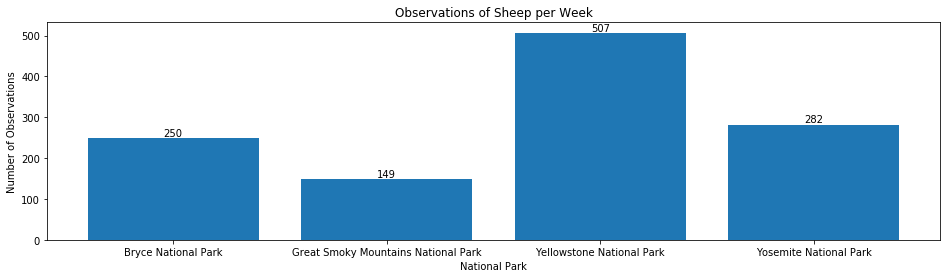

In [42]:
x1 = obs_by_park.park_name.unique()
y1 = obs_by_park.observations


plt.figure(figsize=(16,4))
ax = plt.subplot()
plt.bar(range(len(x1)), y1)
ax=plt.subplot()
ax.set_xticks(range(len(x1)))
ax.set_xticklabels(x1)
plt.xlabel("National Park")
plt.ylabel("Number of Observations")
plt.title("Observations of Sheep per Week")

rects = ax.patches

# Now make some labels
labels = y1

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.show()

plt.savefig('Observations_Sheep_per_Week_barchart.png')

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage point.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the sample size calculator at <a href="https://www.optimizely.com/sample-size-calculator/">Optimizely</a> to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [43]:
number_of_sheep_to_observe = 520

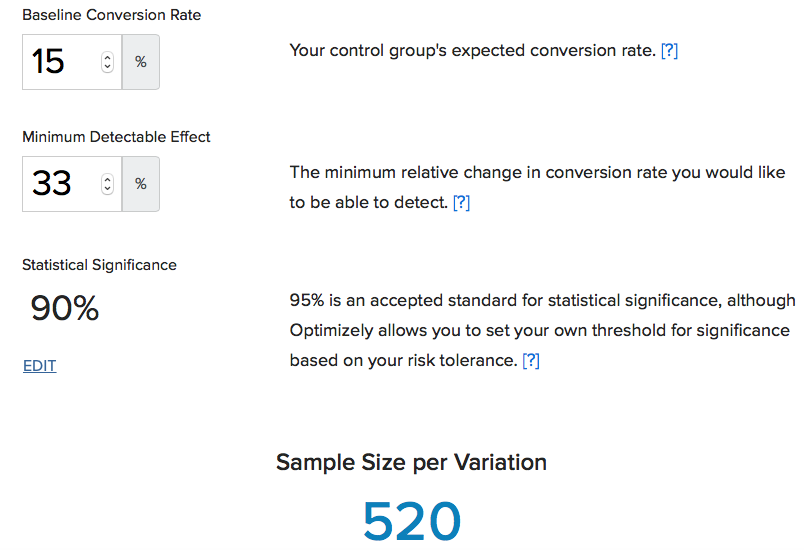

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [44]:
Bryce_number_of_weeks = number_of_sheep_to_observe/250.00
Bryce_number_of_weeks

2.08

In [45]:
#Would need to have 3 weeks of observations to hit the number of observations threshold. 

In [46]:
Yellowstone_number_of_weeks = number_of_sheep_to_observe/507.00
Yellowstone_number_of_weeks

1.0256410256410255

In [47]:
#Would need to have 2 weeks of observations to hit the number of observations threshold, need to round up.

**Extra work to look at types of mammals who are endangered...**


In [48]:
mammals = species[species.category == "Mammal"]
mammals.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [49]:
mammals_names = mammals.common_names.nunique()
mammals_names

205

In [50]:
mammals['names_split'] =mammals.common_names.str.split(' ')
mammals.head()

/Users/shannon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,names_split
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,"[Gapper's, Red-Backed, Vole]"
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,"[American, Bison,, Bison]"
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,"[Aurochs,, Aurochs,, Domestic, Cattle, (Feral)..."
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,"[Domestic, Sheep,, Mouflon,, Red, Sheep,, Shee..."
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,"[Wapiti, Or, Elk]"


In [51]:
split_names = mammals.names_split.str.get(-1)
split_names.head()

0       Vole
1      Bison
2     Cattle
3    (Feral)
4        Elk
Name: names_split, dtype: object

In [52]:
mammals['last_word'] = mammals.names_split.str.get(-1)
mammals.head(10)

/Users/shannon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,names_split,last_word
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,"[Gapper's, Red-Backed, Vole]",Vole
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,"[American, Bison,, Bison]",Bison
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,"[Aurochs,, Aurochs,, Domestic, Cattle, (Feral)...",Cattle
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,"[Domestic, Sheep,, Mouflon,, Red, Sheep,, Shee...",(Feral)
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,"[Wapiti, Or, Elk]",Elk
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False,"[White-Tailed, Deer]",Deer
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False,"[Feral, Hog,, Wild, Pig]",Pig
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False,[Coyote],Coyote
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False,"[Gray, Wolf]",Wolf
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False,"[Red, Wolf]",Wolf


In [53]:
unique_last_word_name = mammals.last_word.nunique()
unique_last_word_name

63

In [62]:
mammals['last_word'].value_counts()[0:10]

Shrew         18
Bat           17
Myotis        17
Mouse         15
Chipmunk      13
Squirrel      12
Vole          11
Fox            5
Cottontail     5
Woodrat        5
Name: last_word, dtype: int64

In [54]:
names_last_word = mammals.groupby(['last_word', 'conservation_status']).scientific_name.count().reset_index()
names_last_word.head(10)

,last_word,conservation_status,scientific_name
0,(Feral),No Intervention,1
1,Badger,Species of Concern,2
2,Bat,No Intervention,10
3,Bat,Species of Concern,7
4,Bear,No Intervention,3
5,Bear,Threatened,1
6,Beaver,No Intervention,3
7,Beaver,Species of Concern,1
8,Bison,No Intervention,1
9,Boar,No Intervention,1


In [65]:
names_lastword_pivot = names_last_word.pivot(columns = 'conservation_status', 
                                             index = 'last_word', 
                                             values = 'scientific_name').reset_index().sort_values(by=['Endangered','Species of Concern']
                                                                                                   ,ascending=[False, False])
names_lastword_pivot.head()

conservation_status,last_word,Endangered,In Recovery,No Intervention,Species of Concern,Threatened
59,Wolf,3.0,1.0,NaN,NaN,NaN
37,Myotis,2.0,NaN,2.0,12.0,1.0
51,Sheep,1.0,NaN,NaN,1.0,NaN
54,Squirrel,1.0,NaN,11.0,NaN,NaN
2,Bat,NaN,NaN,10.0,7.0,NaN


In [56]:
names_lastword_pivot = names_last_word.pivot(columns = 'conservation_status', 
                                             index = 'last_word', 
                                             values = 'scientific_name').reset_index().sort_values(by='Threatened')
names_lastword_pivot.head()

conservation_status,last_word,Endangered,In Recovery,No Intervention,Species of Concern,Threatened
3,Bear,NaN,NaN,3.0,NaN,1.0
37,Myotis,2.0,NaN,2.0,12.0,1.0
0,(Feral),NaN,NaN,1.0,NaN,NaN
1,Badger,NaN,NaN,NaN,2.0,NaN
2,Bat,NaN,NaN,10.0,7.0,NaN


In [60]:
names_lastword_pivot = names_last_word.pivot(columns = 'conservation_status', 
                                             index = 'last_word', 
                                             values = 'scientific_name').reset_index().sort_values(by='Species of Concern')
names_lastword_pivot.head(12)

conservation_status,last_word,Endangered,In Recovery,No Intervention,Species of Concern,Threatened
4,Beaver,NaN,NaN,3.0,1.0,NaN
13,Coyote,NaN,NaN,NaN,1.0,NaN
22,Hare,NaN,NaN,1.0,1.0,NaN
47,Rabbit,NaN,NaN,NaN,1.0,NaN
50,Ringtail,NaN,NaN,NaN,1.0,NaN
51,Sheep,1.0,NaN,NaN,1.0,NaN
52,Shrew,NaN,NaN,17.0,1.0,NaN
1,Badger,NaN,NaN,NaN,2.0,NaN
2,Bat,NaN,NaN,10.0,7.0,NaN
37,Myotis,2.0,NaN,2.0,12.0,1.0
